# Quantum Phase estimation

The phase estimation algorithm is an algorithm that, given a unitary matrix U and an eigenvector $|\Psi \rangle$ with an eigenvalue $e^{i 2\pi \varphi}$, provides an estimation of $\varphi$.The precision on $\varphi$ increases with the number of ancillary qubits, which poses a constraint on noisy quantum computers.$\\$
In this notebook, we present a different approach that allows for an estimation of $\varphi$ using only a single ancillary qubit.

##  Formulation

Let $q_{0} = |+\rangle$ be the auxiliary qubit and $|\Psi\rangle$ a eigenvector of the matrix U. Let's consider the tensor product of the two states:
$|+\rangle |\Psi \rangle = \frac{1}{\sqrt{2}}(|0\rangle|\Psi\rangle + |1\rangle|\Psi\rangle)$

We apply a controled-$U^{2^{t}}$ gate where t it's an integer number.

We recall, the action of a controlled-$U^{2^{t}}$ gate:
If the control qubit is in the state $|0\rangle$, nothing changes. If the control qubit is in the state $|1\rangle$, then the operator $U^{2^{t}}$ acts on the target qubit. Thus,

$$
\begin{align}
controled-U^{2^{t}}[|+\rangle |\Psi \rangle] &= controled-U^{2^{t}}[\frac{1}{\sqrt{2}}(|0\rangle|\Psi\rangle + |1\rangle|\Psi\rangle)] \\
&= \frac{1}{\sqrt{2}}(|0\rangle|\Psi\rangle + e^{i 2\pi 2^{t} \varphi}|1\rangle|\Psi\rangle) \text{ car } U|\Psi\rangle = e^{i 2\pi \varphi} |\Psi\rangle \implies  U^{2^{t}}|\Psi \rangle = e^{i 2\pi 2^{t} \varphi}|\Psi \rangle \\
&= \frac{1}{\sqrt{2}}(|0\rangle +  e^{i 2\pi 2^{t} \varphi}|1\rangle)|\Psi\rangle
\end{align} 
$$

We have:
$$
\begin{align}
(\varphi)_{10} &= (0.\varphi_{1}\varphi_{2}...\varphi_{n})_{2}\\
&= (\varphi_{1}\varphi_{2}...\varphi_{t}.\varphi_{t+1}...\varphi_{n}.2^{-t})_{2}\\
\end{align}
$$
$$
\begin{align}
\implies 2^{t}\varphi &= \varphi_{1}\varphi_{2}...\varphi_{t}.\varphi_{t+1}...\varphi_{n}\\
&= \varphi_{1}\varphi_{2}...\varphi_{t} + 0.\varphi_{t+1}...\varphi_{n}
\end{align}
$$
$$
\begin{align}
\implies e^{i 2\pi 2^{t} \varphi} &= e^{i 2\pi \varphi_{1}\varphi_{2}...\varphi_{t}}.e^{i 2\pi 0.\varphi_{t+1}...\varphi_{n}} \text{ with } e^{i 2\pi \varphi_{1}\varphi_{2}...\varphi_{t}} = 1\\
&=e^{i 2\pi 0.\varphi_{t+1}...\varphi_{n}}
\end{align}
$$

for t = n -1, $e^{i 2\pi 2^{n-1} \varphi} = e^{i 2\pi 0.\varphi_{n}}$:
if $\varphi_{n}$ = 0 , the final state is $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
if $\varphi_{n}$ = 1 , the final state is $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

It only takes a measurement of the auxiliary qubit in the **X** basis ($|+\rangle, |-\rangle$) to determine whether the bit $\varphi_{n}$ is 0 or 1.$\\$
Now $\varphi_{n-1}:$

We apply controlled-$U^{2^{n}}$, which results in the state:
$$
\begin{align}
\frac{1}{\sqrt{2}}(|0\rangle +  e^{i 2\pi 0.\varphi_{n-1}\varphi_{n}}|1\rangle)|\Psi\rangle\\
\implies \frac{1}{\sqrt{2}}(|0\rangle +  e^{i 2\pi 0.\varphi_{n-1}}e^{i 2\pi \frac{\varphi_{n}}{4}}|1\rangle)|\Psi\rangle
\end{align}
$$
We now apply a controlled rotation of angle $-2\pi \frac{\varphi_{n}}{4}$ around the **Z** axis, which gives us the state $\frac{1}{\sqrt{2}}(|0\rangle +  e^{i 2\pi 0.\varphi_{n-1}}|1\rangle)|\Psi\rangle$. We encounter the same situation as with $\varphi_{n}$.

Thus, at the $k^{th}$ iteration, we find the bit $\varphi_{n-k+1}$ by applying the controlled operator $U^{2^{n-k}}$, followed by a rotation of angle $\alpha_{k} = -2 \pi 0.0 \varphi_{n-k+2}...\varphi_{n} = -\pi [1 - (\frac{1}{2})^{k-1}]$. Finally, a measurement of the auxiliary qubit in the **X** basis determines whether $\varphi_{n-k+1}$ is equal to 0 or 1.


## Implémentation

Let's consider the matrix:
$$ S =
\begin{pmatrix}
1 & 0\\
0 & e^{i3\pi / 4}
\end{pmatrix}$$

With the eigenvector:
$$ |1\rangle =
\begin{pmatrix}
0\\
1
\end{pmatrix}$$

in this case $\varphi = \frac{3}{8} = (0.011)_{2}$

In [1]:
from qiskit import ClassicalRegister , QuantumCircuit, QuantumRegister

import numpy as np

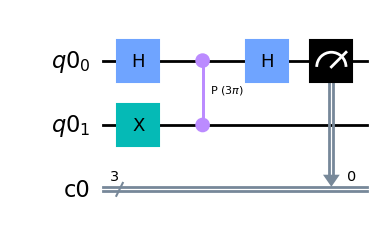

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(3) #For tree classicals bites
qc = QuantumCircuit(qr , cr)

qc.h(qr[0]) #auxiliary qubit
qc.x(qr[1]) # eigenvector
#qc.cp((3/2)*np.pi , qr[0] , qr[1])
qc.cp(3*np.pi , qr[0] , qr[1])
qc.h(qr[0])
qc.measure(qr[0] , cr[0]) # this is the controlled-U^(2^n-1) operator for determine phi_n                        
qc.draw("mpl")

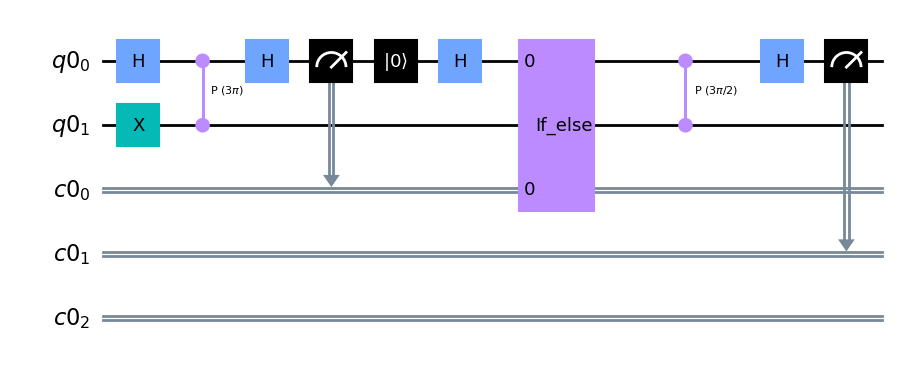

In [3]:
qc.reset(qr[0])
qc.h(qr[0])

# la valeur du bit du poids le plus faible est dans cr[0].
#Si cr[0] = 1 on enléve le bit de poids le plus faible en fesant la rotation alpha_2
#et on continu le bit n-1 devient le bit le bit de poids le plus faible
#si cr[0] est à 0 alors on peut appliquer directement la matrice unitaire associé sans avoir 
#à faire de rotation inverse alpha_k
with qc.if_test((cr[0] , 1)) as else_: 
    qc.p(-np.pi/2 , qr[0])
    
#qc.cp((3/8)*np.pi , qr[0] ,qr[1])
qc.cp((3/2)*np.pi , qr[0] ,qr[1])
    
qc.h(qr[0]) # For make measure in X basis {|0> , |1>}
qc.measure(qr[0] , cr[1])
qc.draw("mpl")

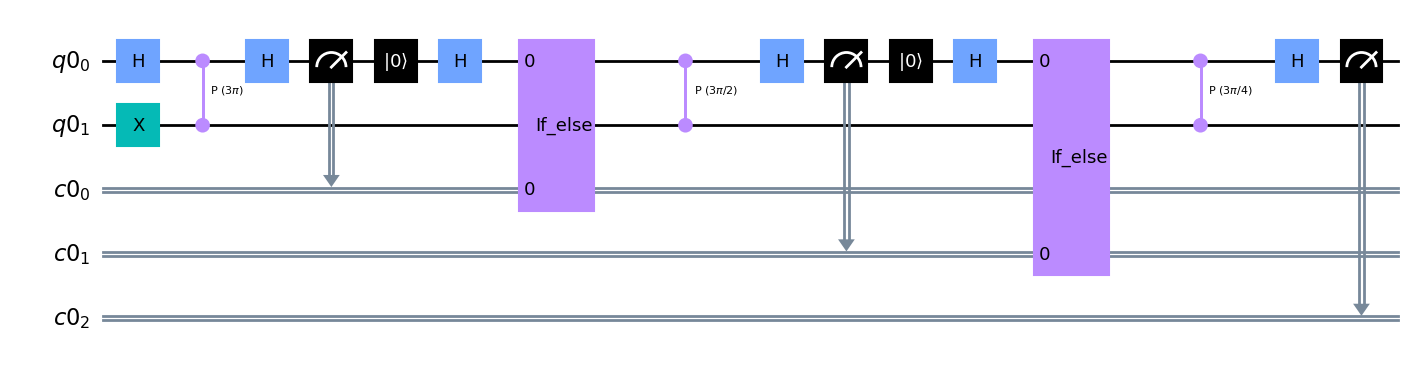

In [4]:
qc.reset(qr[0])
qc.h(qr[0])

# la valeur du bit du poids le plus faible est dans cr[0].
#Si cr[0] = 1 on enléve le bit de poids le plus faible en fesant la rotation alpha_2
#et on continu le bit n-1 devient le bit le bit de poids le plus faible
#si cr[0] est à 0 alors on peut appliquer directement la matrice unitaire associé sans avoir 
#à faire de rotation inverse alpha_k
with qc.if_test((cr[1] , 1)) as else_: 
    qc.p(-(3/4)*np.pi , qr[0])
    

qc.cp((3/4)*np.pi , qr[0] ,qr[1])
    
qc.h(qr[0]) # For make measure in X basis {|0> , |1>}
qc.measure(qr[0] , cr[2])
qc.draw("mpl")

In [5]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
counts

{'011': 1000}